### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

### Importing dataframes

In [2]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv("train.csv")

### Studying dataset

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Since majority of cabin values are missing -> remove the column

#### * PassengerId is unique -> drop column
#### * Name is unique -> drop column
#### * TicketId is unique-> drop column

#### * They do not contribute to the survival probability.

### Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

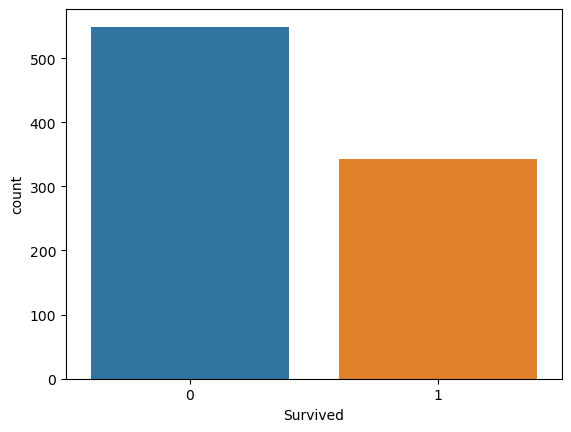

In [6]:
sns.countplot(x="Survived",data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

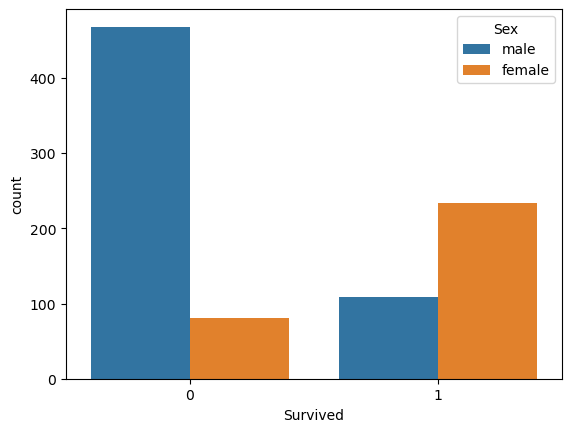

In [7]:
sns.countplot(x="Survived",hue="Sex",data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

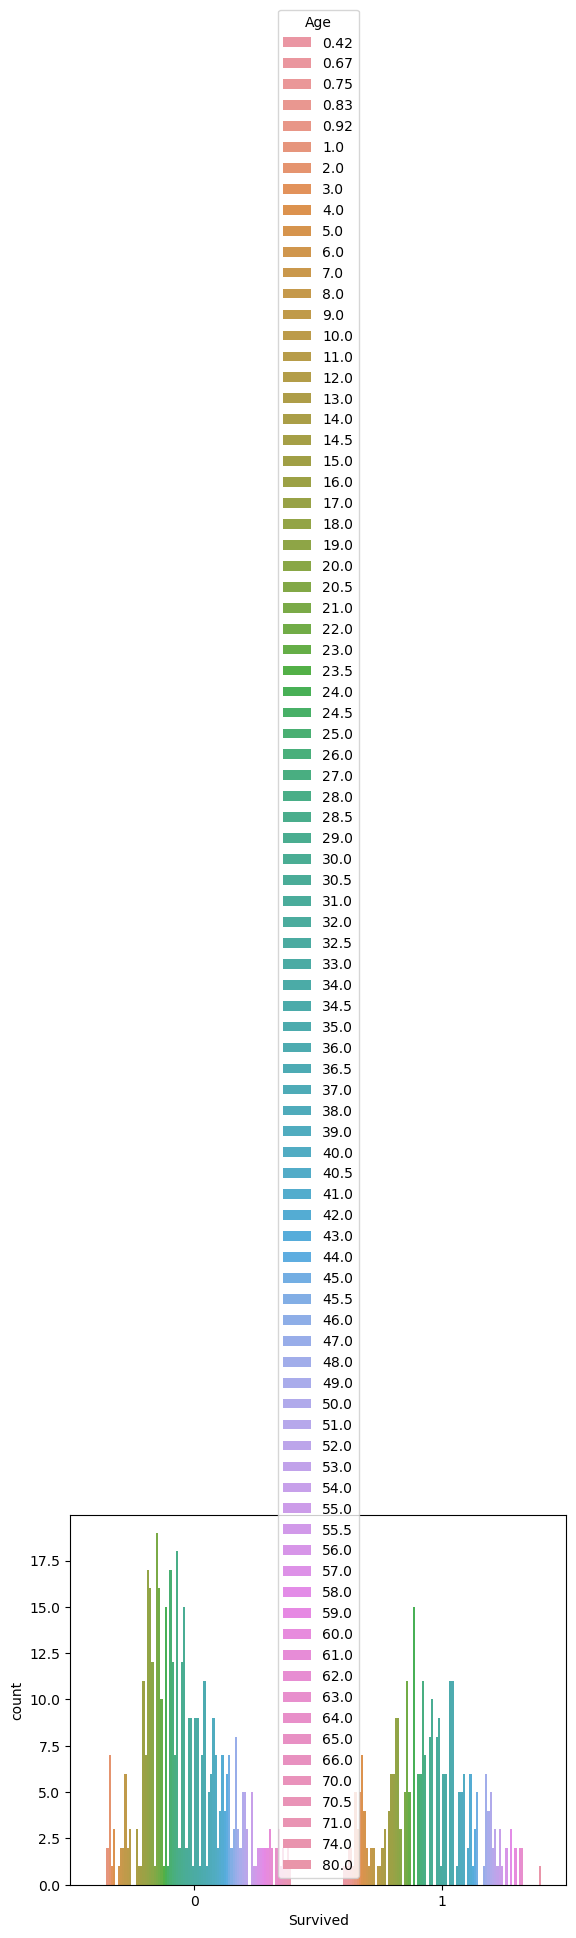

In [8]:
sns.countplot(x="Survived",hue="Age",data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

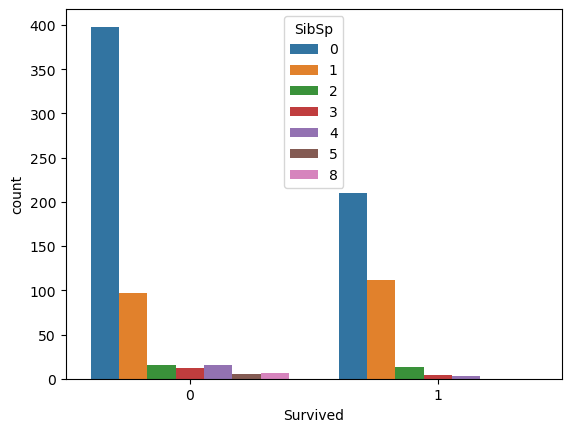

In [9]:
sns.countplot(x="Survived",hue="SibSp",data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

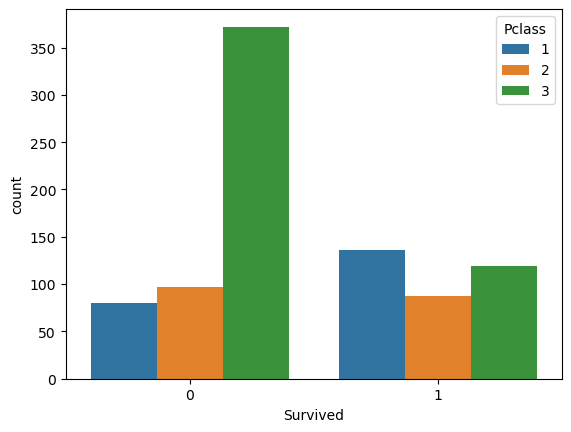

In [10]:
sns.countplot(x="Survived",hue="Pclass",data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

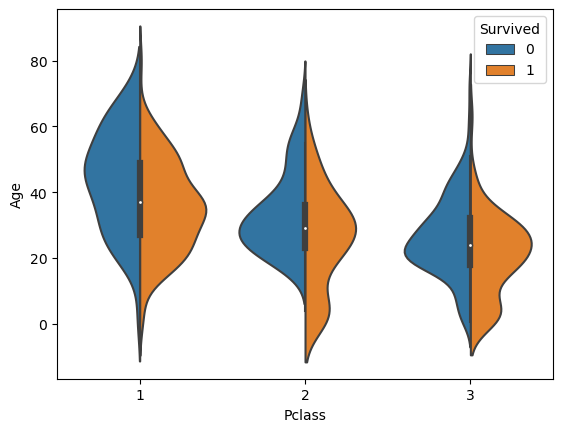

In [11]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True)

### Feature selection

In [12]:
df_train.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)
df_test.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [13]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df_train=df_train[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']]
df_test=df_test[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]

### Data pre-processing

In [15]:
#handling null values in Age 

df_train.Age.fillna(df_train.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

#changing data type

df_train.Age=df_train.Age.astype(int)
df_test.Age=df_test.Age.astype(int)

In [16]:
#Ages grouped -- encoding Age column
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [17]:
#Handling null values in train dataset
df_train.isna().sum()

Age         0
Embarked    2
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [18]:
df_train= df_train.dropna()
df_train.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [19]:
#Handling null values in test dataset
df_test.isna().sum()

Age         0
Embarked    0
Fare        1
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [20]:
df_test.Fare.fillna(df_test.Fare.mean(), inplace=True)
df_test.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [21]:
df_train.shape

(889, 8)

In [22]:
#Encoding Fare column
data = [df_train,df_test]
for d in data:
    d.loc[ d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       889 non-null    int32 
 1   Embarked  889 non-null    object
 2   Fare      889 non-null    int32 
 3   Parch     889 non-null    int64 
 4   Pclass    889 non-null    int64 
 5   Sex       889 non-null    object
 6   SibSp     889 non-null    int64 
 7   Survived  889 non-null    int64 
dtypes: int32(2), int64(4), object(2)
memory usage: 55.6+ KB


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       418 non-null    int32 
 1   Embarked  418 non-null    object
 2   Fare      418 non-null    int32 
 3   Parch     418 non-null    int64 
 4   Pclass    418 non-null    int64 
 5   Sex       418 non-null    object
 6   SibSp     418 non-null    int64 
dtypes: int32(2), int64(3), object(2)
memory usage: 19.7+ KB


In [25]:
df_=df_train.append(df_test)
df_.shape

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\1123579137.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_train.append(df_test)


(1307, 8)

### Calculations for model

In [26]:
survived_yes=df_train.loc[df_train.Survived==1]
P_yes=len(survived_yes)/len(df_train)
P_yes # Probability of Survival in training data


survived_no=df_train.loc[df_train.Survived==0]
P_no=len(survived_no)/len(df_train)
P_no # Probability of not Survival in training data

print("P_yes = ",P_yes,"\nP_no = ",P_no)

P_yes =  0.38245219347581555 
P_no =  0.6175478065241845


In [27]:
# value counts of each category of an attribute.

for col in df_.columns:
    count=df_[col].value_counts() 
    print(count)
    
atr=list(df_.columns.values)
output_dataframe= pd.DataFrame(columns = ['Actual', 'Predicted']) 
output_dataframe.head()

4    442
6    214
3    170
2    138
5    138
1    105
0     91
7      9
Name: Age, dtype: int64
S    914
C    270
Q    123
Name: Embarked, dtype: int64
0    360
1    313
2    305
3    245
4     67
5     17
Name: Fare, dtype: int64
0    1000
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64
3    709
1    321
2    277
Name: Pclass, dtype: int64
male      843
female    464
Name: Sex, dtype: int64
0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
0.0    549
1.0    340
Name: Survived, dtype: int64


,Actual,Predicted


In [28]:
df_test.shape

(418, 7)

In [29]:
result_arr=[]

for i in df_test.itertuples():
    test1=list(i)
    test1.pop(0) # removing Index (unwanted)
    ans=test1.pop() # removing actual value
    
    py=1
    for i in range(6):
        val = df_train[(df_train[atr[i]] == test1[i]) & (df_train.Survived == 1)].count().values.item(0)
        py = py * (val) / len(survived_yes)
        total_yes = py * P_yes
        
    pn=1
    for i in range(6):
        val = df_train[(df_train[atr[i]] == test1[i]) & (df_train.Survived == 0)].count().values.item(0)
        pn = pn * (val) / len(survived_no)
        total_no = pn * P_no
        
    if total_yes>total_no:
        result=1
        list1=[[ans,1]] #Survived
        output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
    else:
        result=0
        list0=[[ans,0]] #NotSurvived
        output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
        
    result_arr.append(result)

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\2205925660.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_75800\22059256

In [30]:
df_test_=pd.read_csv('test.csv') #to access passenger id

In [31]:
output = pd.DataFrame({'PassengerId': df_test_.PassengerId,'Survived': result_arr})
output.to_csv('nb_submission.csv', index=False)

In [32]:
output.Survived.value_counts()

0    273
1    145
Name: Survived, dtype: int64

### Evaluation

In [33]:
# Evaluation metrics

TP=0
TN=0
FP=0
FN=0
for index,row in output_dataframe.iterrows():
    if row['Predicted']== row['Actual'] and row['Predicted']==1:
        TP += 1
    elif row['Predicted']== row['Actual'] and row['Predicted']==0:
        TN +=1
    elif row['Predicted']==1:
        FP +=1
    else: 
        FN +=1
        
# Accuracy = [TP + TN] / Total Population
accuracy= (TP+TN)/len(output_dataframe)
print("The accuracy for the test set is ",accuracy *100,"%")

# Precision = TP / [TP + FP]
# tells us about the success probability of making a correct positive class classification.
precision = TP / (TP+FP)
print("The precision for the test set is ",precision *100,"%")

# Recall = TP / [TP + FN]
# explains how sensitive the model is towards identifying the positive class.
recall =  TP / (TP+FN)
print("The recall for the test set is ",recall *100,"%")

The accuracy for the test set is  67.94258373205741 %
The precision for the test set is  46.89655172413793 %
The recall for the test set is  54.400000000000006 %


### Accuracy

In [34]:
df_actual = pd.read_csv('gender_submission.csv')

In [35]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [36]:
df_actual.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
c=0
for i in range(0,418):
    if df_actual.Survived[i]==output.Survived[i]:
        c=c+1
        
acc =( c/418 )*100
print(acc)

81.10047846889952


In [38]:
print(round(acc,2),"%")

81.1 %


# KNN


In [63]:
from math import sqrt

In [64]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv("train.csv")

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data-preprocessing

In [66]:
df_train.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)
df_test.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [67]:
#handling null values in Age 

df_train.Age.fillna(df_train.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

#changing data type

df_train.Age=df_train.Age.astype(int)
df_test.Age=df_test.Age.astype(int)

In [68]:
df_train= df_train.dropna()
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [69]:
#Handling null values in test dataset
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [70]:
df_test.Fare.fillna(df_test.Fare.mean(), inplace=True)
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [71]:
#Ages grouped -- encoding Age column
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
#Encoding Fare column
data = [df_train,df_test]
for d in data:
    d.loc[ d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)
    
#Encoding Sex column
data = [df_train,df_test]
for d in data:
    d.loc[ d['Sex'] == 'male', 'Sex'] = 0
    d.loc[ d['Sex'] == 'female', 'Sex'] = 1
    
#Encoding Embarked column
data = [df_train,df_test]
for d in data:
    d.loc[ d['Embarked'] == 'C', 'Embarked'] = 0
    d.loc[ d['Embarked'] == 'Q', 'Embarked'] = 1
    d.loc[ d['Embarked'] == 'S', 'Embarked'] = 2

In [72]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,0,2
1,1,1,1,5,1,0,3,0
2,1,3,1,3,0,0,0,2
3,1,1,1,5,1,0,3,2
4,0,3,0,5,0,0,1,2


In [73]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,5,0,0,0,1
1,3,1,6,1,0,0,2
2,2,0,6,0,0,1,1
3,3,0,3,0,0,1,2
4,3,1,2,1,1,1,2


In [74]:
df_test=df_test.to_numpy()
df_test

array([[3, 0, 5, ..., 0, 0, 1],
       [3, 1, 6, ..., 0, 0, 2],
       [2, 0, 6, ..., 0, 1, 1],
       ...,
       [3, 0, 5, ..., 0, 0, 2],
       [3, 0, 4, ..., 0, 1, 2],
       [3, 0, 4, ..., 1, 2, 0]], dtype=object)

### Model

In [83]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [84]:
X = df_train.drop(["Survived"],axis=1)
X=X.to_numpy()
X.shape

(889, 7)

In [85]:
y=df_train["Survived"]
y=y.to_numpy()

### Predicition

In [87]:
clf = KNN(k=5)
clf.fit(X, y)
predictions = clf.predict(df_test)

print(predictions)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [88]:
df_actual = pd.read_csv('gender_submission.csv')
y_test = df_actual["Survived"]
y_test=y_test.to_numpy()

### Accuracy

In [89]:
acc = np.sum(predictions == y_test) / len(y_test)
print(round(acc*100,2)," %")

82.78  %


In [90]:
df_test_=pd.read_csv('test.csv') #to access passenger id

In [91]:
knn_submission = pd.DataFrame({'PassengerId': df_test_.PassengerId,'Survived': predictions})
knn_submission.to_csv('knn_submission.csv', index=False)